Library import

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score

Data import

In [5]:
URL = "datasets\KNN-diabetes.csv"
RawData = pd.read_csv(URL)
RawData.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


Data Prep

In [6]:
#As far as the dataset goes, there are no columns that can not be used for predicting diabetes in other words: nothing has to be eliminated from the dataset.
PrepData = RawData.drop(['Age', 'Pregnancies'], axis=1)
PrepData.head()

#The column 'Outcome' is what we want to predict, 1 is tested and diagnosed with Diabetes and 0 is tested but not diagnosed with diabetes.
cntOutcome = PrepData['Outcome'].value_counts()
propOutcome = PrepData['Outcome'].value_counts(normalize=True)

#Amount of Outcomes
cntOutcome

#Normalized amount of Outcomes
propOutcome

#Transform the column 'Outcome' to the type Category instead of integer. 
#This is necessary since most models in general cannot use an Integer as a category, they require a column of the type 'Category
catType = pd.CategoricalDtype(categories=[0, 1], ordered=False)
PrepData['Outcome'] = PrepData['Outcome'].astype(catType)
PrepData['Outcome']

#To see if it worked, uncomment the follow line of code (22):
PrepData.info()

#The data set contains 7 fields on which the outcome can be based. The following line of code allows us to take a more detailed look into the data:
#PrepData[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness','Insulin','BMI','DiabetesPedigreeFunction', 'Age']].describe()

#To have a more realistic and clear view the data, we will normalize it so we can make better comparisons for each column
def normalize(x):
  return((x - min(x)) / (max(x) - min(x))) #function to normalize

excluded = ['Outcome'] #This column will be excluded
X = PrepData.loc[:, ~PrepData.columns.isin(excluded)] #This will fetch the data minus the excluded column and put it into the variable X
X = X.apply(normalize, axis=0) #This will drag the variable X through the normalize function
X[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction']].describe() #This is the same as earlier code but now normalized

#for the final preparation we will split our data into two group: Test and Train using the following function:
y = PrepData['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123, stratify=y) #Test and train will be 30/70 percent of the data.

##################################
#DATA PREPARATION IS NOW COMPLETE#
##################################

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Glucose                   768 non-null    int64   
 1   BloodPressure             768 non-null    int64   
 2   SkinThickness             768 non-null    int64   
 3   Insulin                   768 non-null    int64   
 4   BMI                       768 non-null    float64 
 5   DiabetesPedigreeFunction  768 non-null    float64 
 6   Outcome                   768 non-null    category
dtypes: category(1), float64(2), int64(4)
memory usage: 37.0 KB


Modelling and evaluation

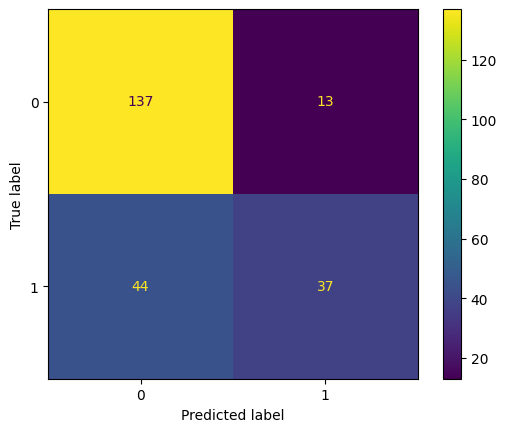

In [7]:
#After the preparation we can finally begin to model and execute the code. For k-Nearest Neighbour we can use the following code:

#Model in Pseudocode:
# for each instance in the test set:
#     for each instance in the training set:
#         calculate the distance between the two instances
#     sort the distances in ascending order
#     find the K nearest neighbors
#     predict the class based on the majority class among the K nearest neighbors

#Model in python code:
knn = KNeighborsClassifier(n_neighbors=10) 
#This means that it will classify the data using it's 10 nearest neighbours. 
#So in other words: I have 10 neighbours with similar data, what is their classification? If most or all, for example, are category 1, it will apply category 1.

knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

cm = confusion_matrix(y_test, y_pred, labels=knn.classes_)
cm

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn.classes_)
disp.plot()

plt.show()
